In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sine_data_extraction as sde


file_path  = "../data/Collin_treadwalk_2_AntData_2025_03_06_15_51" + '.csv'
data = pd.read_csv(file_path)
# Display the first few rows
print(data.head())
print(data.columns)


       Time  PowerKeyState  FuncKeyState   UpKeyState   DownKeyState   \
0  0.000549              0              0            0              0   
1  0.023461              0              0            0              0   
2  0.049011              0              0            0              0   
3  0.079576              0              0            0              0   
4  0.110722              0              0            0              0   

   DeviceError   Battery   DeviceMs   BackIncl   HipAngle_L   ...  HipTor_L   \
0             1        64    8603480   3.237076     0.856217  ...  -0.000468   
1             1        64    8603502   3.233326     0.831417  ...   0.004774   
2             1        64    8603528   3.223695     0.807641  ...  -0.000369   
3             1        64    8603559   3.207069     0.785398  ...  -0.000905   
4             1        64    8603590   3.189943     0.763667  ...  -0.003133   

   HipTor_R   Voltage   Current   AccX   AccY   AccZ   GyroX   GyroY   GyroZ  
0

In [2]:
data.columns = [s.strip() for s in data.columns] 
columns = data.columns
# columns

In [3]:
#print(data.head())

In [4]:
#print(data.dtypes)


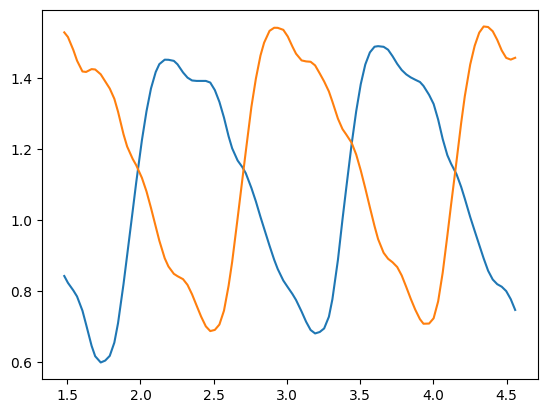

In [5]:
plt.plot(data['Time'][50:150], data['HipAngle_L'][50:150], label='Left Hip Angle')
plt.plot(data['Time'][50:150], data['HipAngle_R'][50:150], label='Right Hip Angle')
#time,LeftHipAngle,RightHipAngle

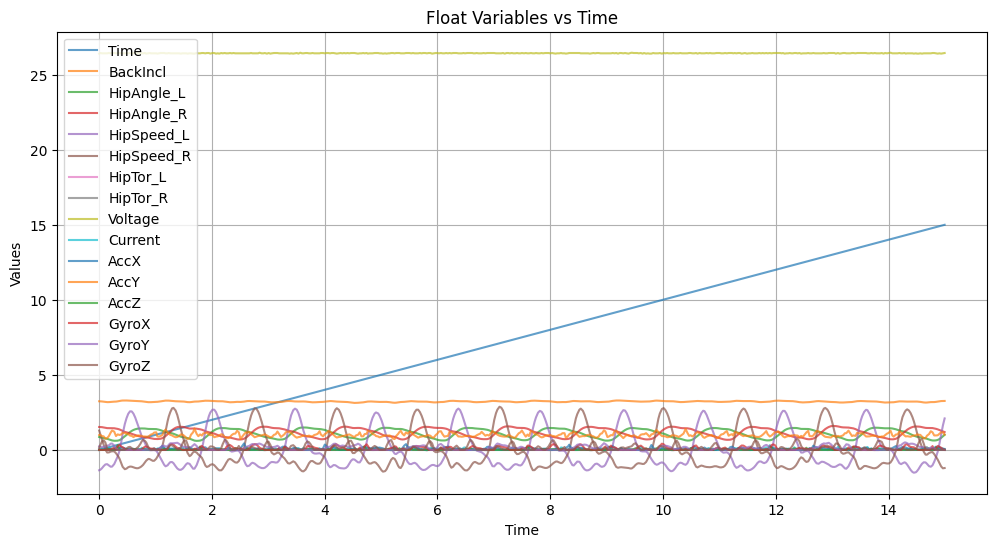

In [6]:
import matplotlib.pyplot as plt

# Exclude integer columns
float_cols = data.select_dtypes(include=['float64']).columns

# Plot all float columns against time
plt.figure(figsize=(12, 6))
for col in float_cols:
    plt.plot(data['Time'], data[col], label=col, alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Float Variables vs Time")
plt.legend()
plt.grid(True)
plt.show()

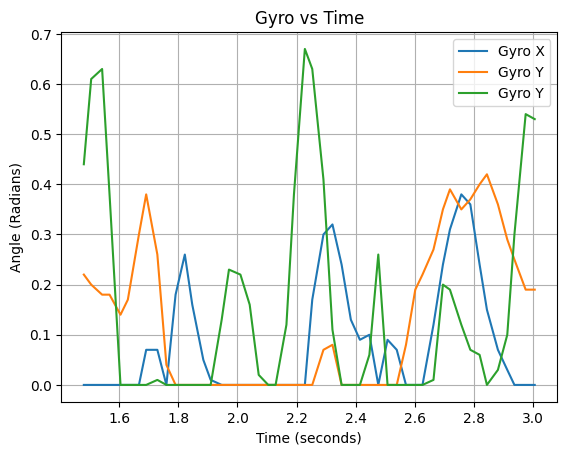

In [7]:
start = 50
end = 100
plt.plot(data['Time'][start:end], data['GyroX'][start:end], label='Gyro X')
plt.plot(data['Time'][start:end], data['GyroY'][start:end], label='Gyro Y')
plt.plot(data['Time'][start:end], data['GyroZ'][start:end], label='Gyro Y')
plt.xlabel("Time (seconds)")
plt.ylabel("Angle (Radians)")
plt.title("Gyro vs Time")
plt.legend()
plt.grid(True)
plt.show()

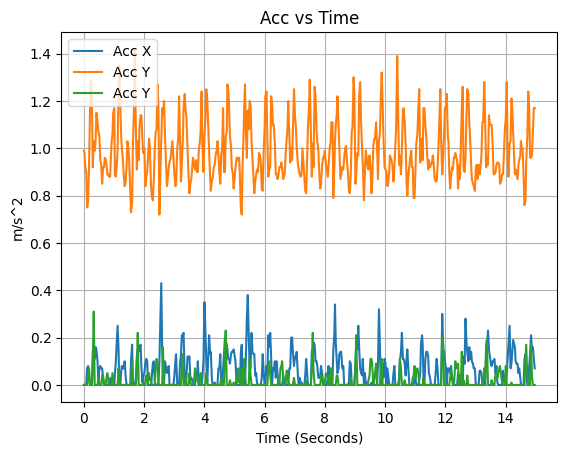

In [8]:
start = 0
end = -1
plt.plot(data['Time'][start:end], data['AccX'][start:end], label='Acc X')
plt.plot(data['Time'][start:end], data['AccY'][start:end], label='Acc Y')
plt.plot(data['Time'][start:end], data['AccZ'][start:end], label='Acc Y')
plt.xlabel("Time (Seconds)")
plt.ylabel("m/s^2")
plt.title("Acc vs Time")
plt.legend()
plt.grid(True)
plt.show()

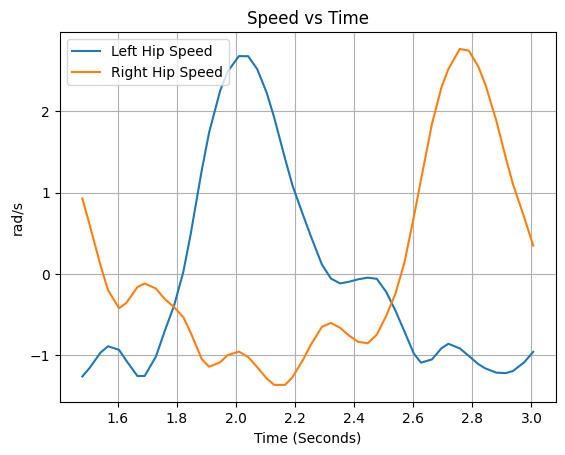

In [9]:
start = 50
end = 100
plt.plot(data['Time'][start:end], data['HipSpeed_L'][start:end], label='Left Hip Speed')
plt.plot(data['Time'][start:end], data['HipSpeed_R'][start:end], label='Right Hip Speed')

plt.xlabel("Time (Seconds)")
plt.ylabel("rad/s")
plt.title("Speed vs Time")
plt.legend()
plt.grid(True)
plt.show()

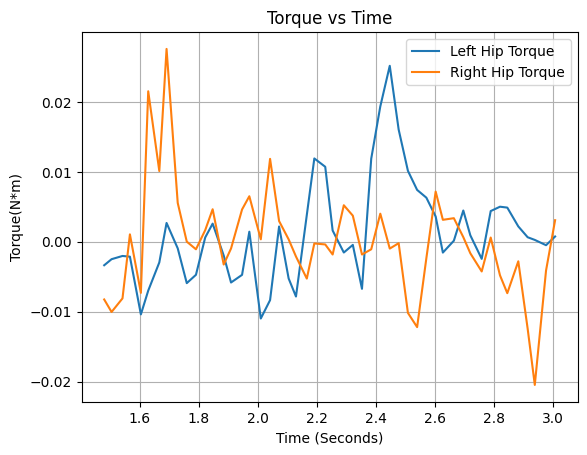

In [10]:
start = 50
end = 100
plt.plot(data['Time'][start:end], data['HipTor_L'][start:end], label='Left Hip Torque')
plt.plot(data['Time'][start:end], data['HipTor_R'][start:end], label='Right Hip Torque')

plt.xlabel("Time (Seconds)")
plt.ylabel("Torque(N*m)")
plt.title("Torque vs Time")
plt.legend()
plt.grid(True)
plt.show()


Estimated Parameters:
 A = -0.043, B = 8.559, C = 0.324, D = 3.216


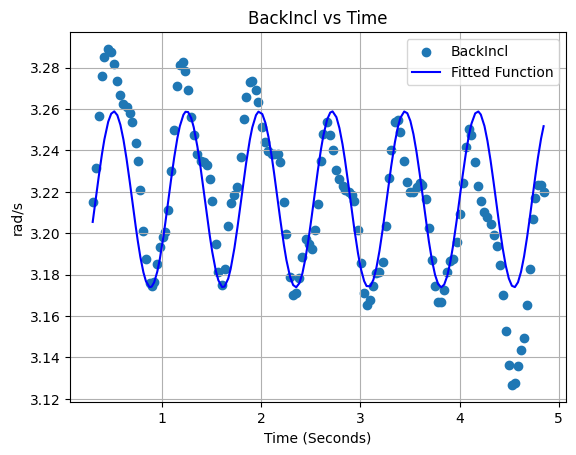

Estimated Parameters:
 A = 0.385, B = 4.333, C = -2.351, D = 1.096


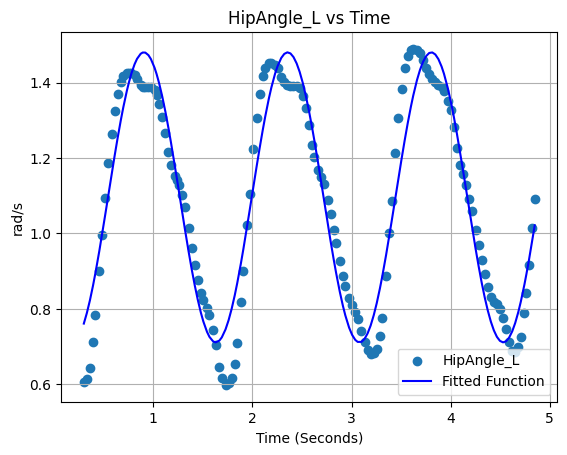

Estimated Parameters:
 A = 0.387, B = 4.313, C = 0.873, D = 1.141


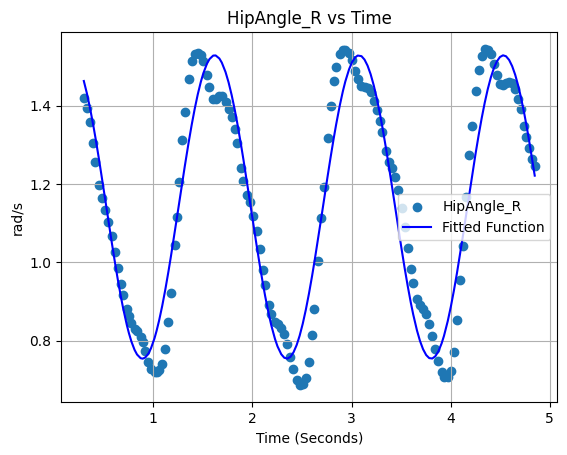

Estimated Parameters:
 A = 1.536, B = 4.316, C = -1.129, D = 0.010


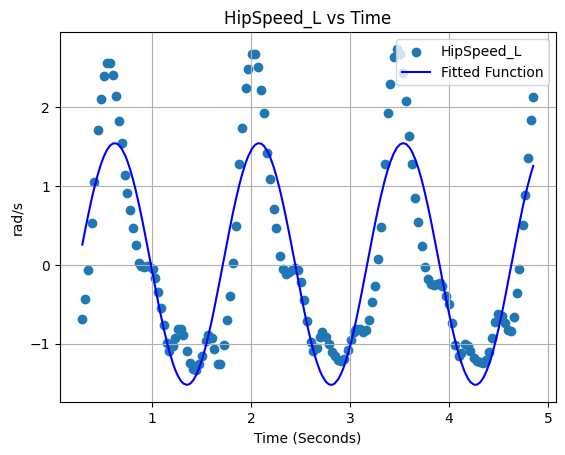

Estimated Parameters:
 A = -1.535, B = 4.327, C = -1.151, D = 0.011


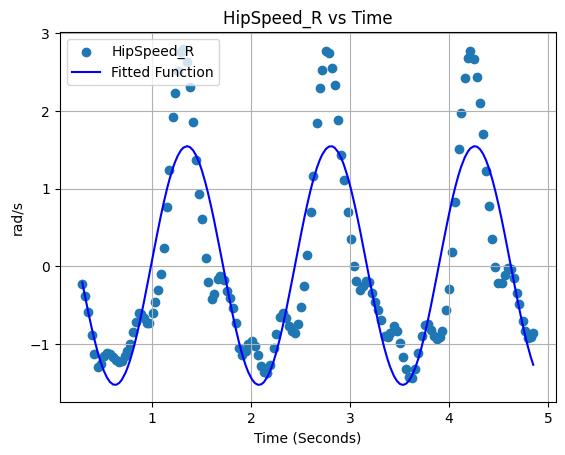

Estimated Parameters:
 A = -0.003, B = 1.017, C = 1.314, D = -0.001


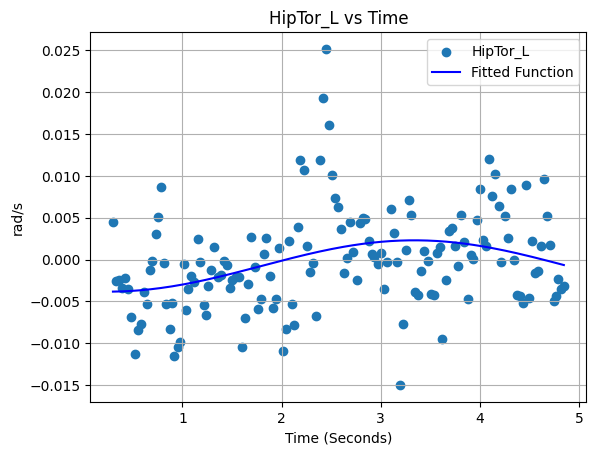

Estimated Parameters:
 A = -0.004, B = 2.976, C = -1.190, D = 0.000


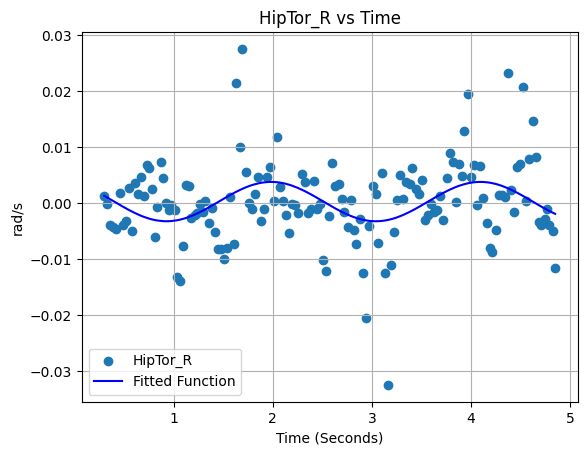

Estimated Parameters:
 A = 0.061, B = 8.645, C = -1.941, D = 0.065


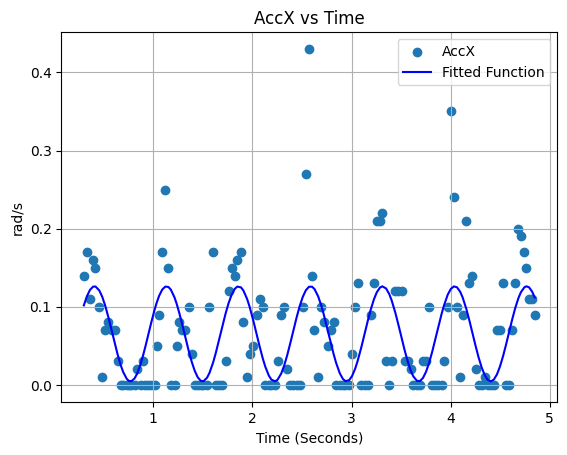

Estimated Parameters:
 A = -0.105, B = 25.988, C = -1.325, D = 0.994


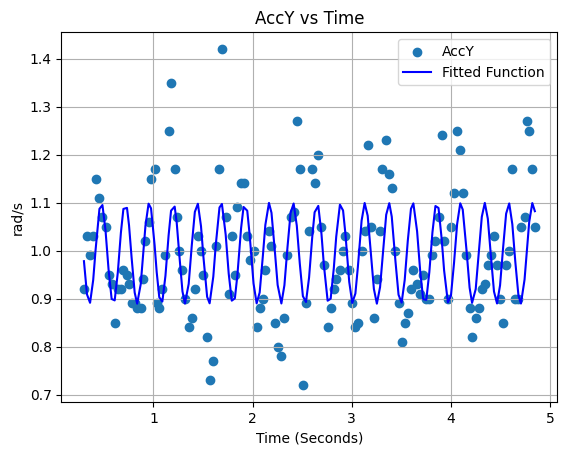

Estimated Parameters:
 A = -0.024, B = 30.140, C = 0.974, D = 0.019


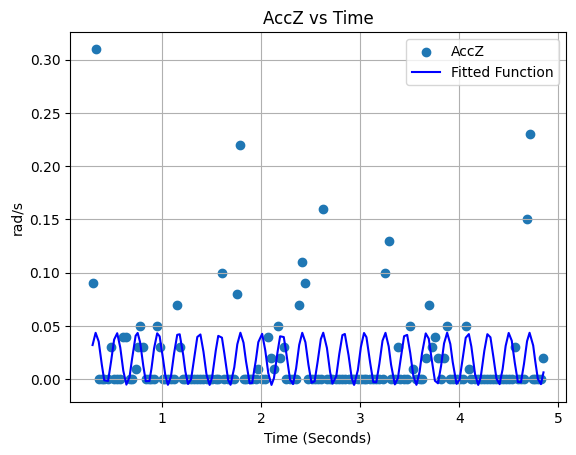

Estimated Parameters:
 A = 0.119, B = 12.964, C = 3.217, D = 0.085


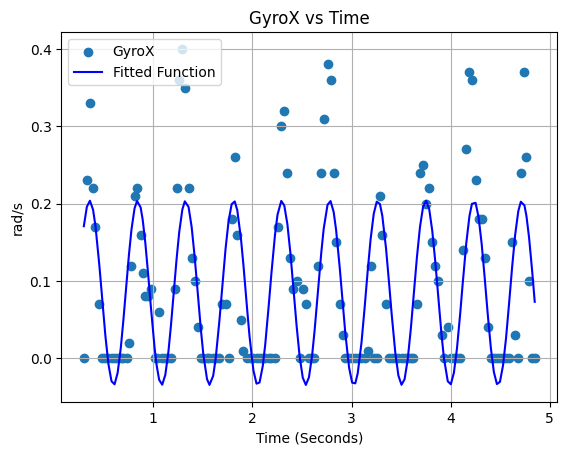

Estimated Parameters:
 A = -0.183, B = 4.274, C = -1.237, D = 0.125


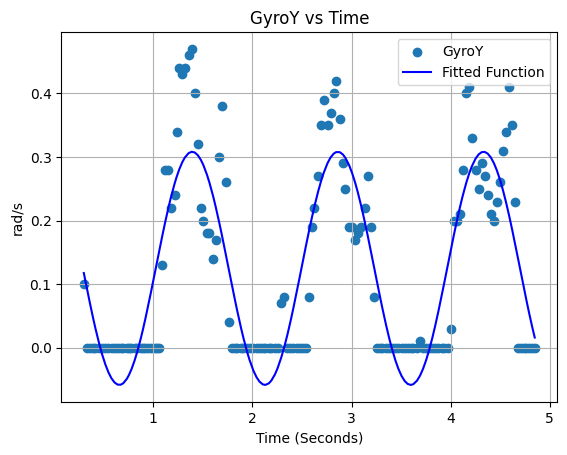

Estimated Parameters:
 A = -0.157, B = 8.646, C = -1.786, D = 0.143


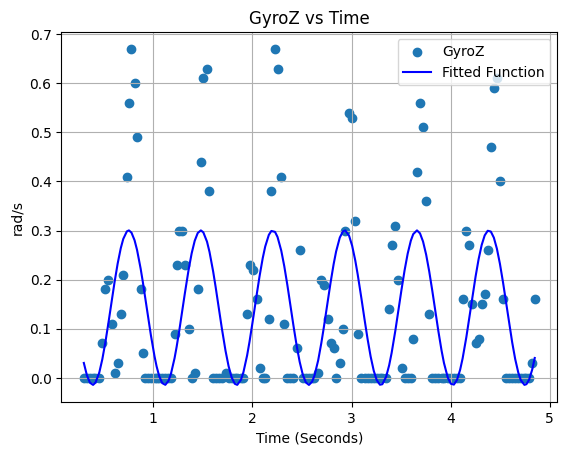

In [11]:
# print(type(data["Time"][start:end]))

alcoll = [ 'BackIncl', 'HipAngle_L', 'HipAngle_R', 'HipSpeed_L', 
          'HipSpeed_R', 'HipTor_L', 'HipTor_R',  'AccX', 'AccY', 'AccZ',
          'GyroX', 'GyroY', 'GyroZ']

start = 10
end = 160
# colname = "HipSpeed_L"

for colname in alcoll:
    plt.scatter(data["Time"][start:end], data[colname][start:end], label=colname)
    # plt.plot(    data["Time"][start:end], data["HipSpeed_R"][start:end], label="Right Hip Speed")
    params = sde.generate_parameters_from_sine(
        data["Time"][start:end].to_numpy(), data[colname][start:end].to_numpy()
    )

    A_fit, B_fit, C_fit, D_fit = params

    plt.plot(
        data["Time"][start:end],
        sde.fit_sinusoidal(data["Time"][start:end], A_fit, B_fit, C_fit, D_fit),
        label="Fitted Function",
        color="blue",
    )
    plt.xlabel("Time (Seconds)")
    plt.ylabel("rad/s")
    plt.title( f"{colname} vs Time")
    plt.legend()
    plt.grid(True)
    plt.show()

Estimated Parameters:
 A = 0.385, B = 4.333, C = -2.351, D = 1.096
Estimated Parameters:
 A = 0.387, B = 4.313, C = 0.873, D = 1.141


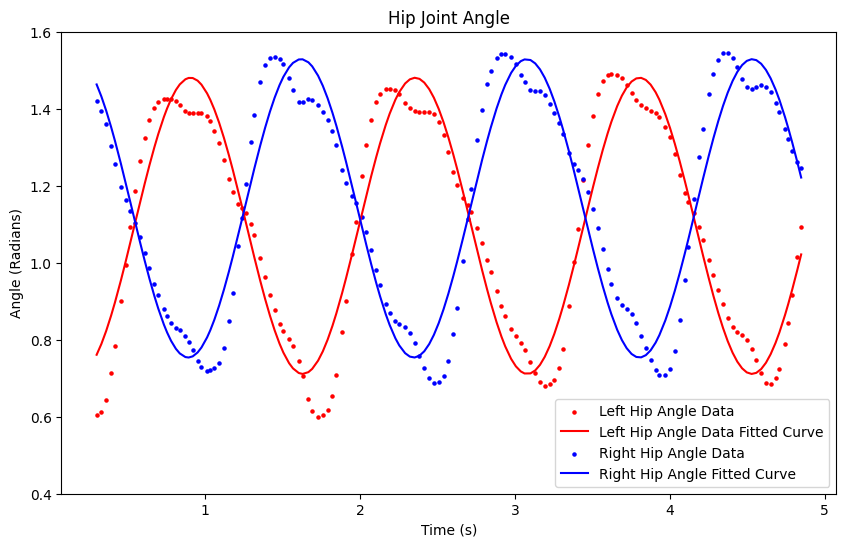

In [12]:
# 'BackIncl', 'HipAngle_L', 'HipAngle_R', 'HipSpeed_L',
#          'HipSpeed_R', 'HipTor_L', 'HipTor_R',  'AccX', 'AccY', 'AccZ',
#          'GyroX', 'GyroY', 'GyroZ'


plt.figure(figsize=(10, 6))

side = "HipAngle_L" 

ltq_params = sde.generate_parameters_from_sine(
    data["Time"][start:end].to_numpy(), data[side][start:end].to_numpy()
    )
[A_fit, B_fit, C_fit, D_fit] = ltq_params

plt.scatter(
    data["Time"][start:end],
    data[side][start:end],
    label="Left Hip Angle Data",
    color="red",
    s=5,
)

plt.plot(
    data["Time"][start:end],
    sde.fit_sinusoidal(data["Time"][start:end].to_numpy(), A_fit, B_fit, C_fit, D_fit),
    label= "Left Hip Angle Data Fitted Curve",
    color="red",
)

side = "HipAngle_R"

ltq_params = sde.generate_parameters_from_sine(
    data["Time"][start:end].to_numpy(), data[side][start:end].to_numpy()
)
[A_fit, B_fit, C_fit, D_fit] = ltq_params

plt.scatter(
    data["Time"][start:end],
    data[side][start:end],
    label=f"Right Hip Angle Data ",
    color="blue",
    s=5,
)

plt.plot(
    data["Time"][start:end],
    sde.fit_sinusoidal(data["Time"][start:end].to_numpy(), A_fit, B_fit, C_fit, D_fit),
    label=f"Right Hip Angle Fitted Curve",
    color="blue",
)
plt.ylim(ymin = .4,ymax = 1.6)
plt.title("Hip Joint Angle")
plt.ylabel("Angle (Radians)")
plt.xlabel("Time (s)" )
plt.legend(loc = "lower right")
#plt.legend(loc = "lower")

In [22]:
vastusdata = pd.readcsv("data\Vastus_lateralis_fast_walking_minute.xlsx", skiprows=6)
vastusdata.head()

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\GERAR\AppData\Local\Temp\ipykernel_33600\1393688106.py:1: SyntaxWarning: invalid escape sequence '\V'
  vastusdata = pd.readcsv("data\Vastus_lateralis_fast_walking_minute.xlsx", skiprows=6)


AttributeError: module 'pandas' has no attribute 'readcsv'